                      Date       Data
0      2016-01-07 12:00:00  17.131250
1      2016-01-07 12:15:00  17.142500
2      2016-01-07 12:30:00  17.153750
3      2016-01-07 12:45:00  17.165000
4      2016-01-07 13:00:00  17.176250
...                    ...        ...
292748 2024-05-13 23:00:00   8.563319
292749 2024-05-13 23:15:00   8.556447
292750 2024-05-13 23:30:00   8.549575
292751 2024-05-13 23:45:00   8.542702
292752 2024-05-14 00:00:00   8.535830

[292753 rows x 2 columns]


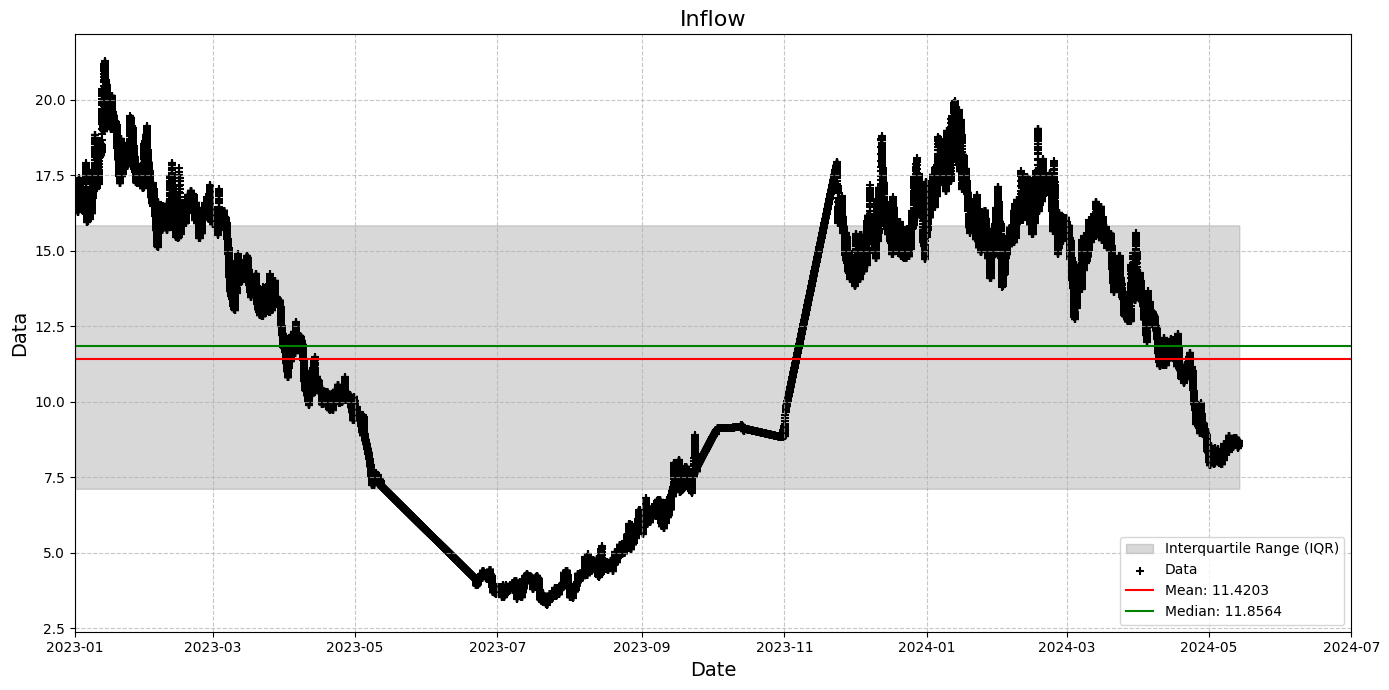

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

files = [
    "../../data-warehouse/inflow/swift_inflow_woods_dam_20160107-20240514.csv"
]

output_folder = '../../../outputs/PYTHON_PLOTS'
# Create the directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in files:
    # Read the data
    data = pd.read_csv(file, usecols=[0,2], encoding='unicode_escape')

    data.columns = ["Date", "Data"]

    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M:%S')
    print(data)

    # Filter the dataframes to include only the data from 2015 to 2024
    start_date = pd.to_datetime('2023-01-01')
    end_date = pd.to_datetime('2024-07-01')

    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Calculate summary statistics
    mean_data = data['Data'].mean()
    median_data = data['Data'].median()
    q1_data = data['Data'].quantile(0.25)
    q3_data = data['Data'].quantile(0.75)

    # # Convert dates to numerical format for linear regression
    # data['Date_ordinal'] = data['Date'].apply(lambda date: date.toordinal())

    # # Perform linear regression
    # slope, intercept, r_value, p_value, std_err = linregress(data['Date_ordinal'], data['Data'])

    # # Create trendline
    # trendline = slope * data['Date_ordinal'] + intercept

    plt.figure(figsize=(14, 7))

    # Plot quartile 1 and quartile 3 as an area plot
    plt.fill_between(data['Date'], q1_data, q3_data, color='grey', alpha=0.3, label='Interquartile Range (IQR)')

    # Plot the raw data
    plt.scatter(data['Date'], data['Data'], label='Data', color='black', marker='+')

    # # Plot the trendline
    # plt.plot(data['Date'], trendline, color='blue', linestyle='-', linewidth=2, label='Trendline')

    # Plot mean and median
    plt.axhline(y=mean_data, color='red', label=f'Mean: {mean_data:.4f}')
    plt.axhline(y=median_data, color='green', label=f'Median: {median_data:.4f}')

    # Set x-axis limits
    #plt.xlim([min(data['Date']), max(data['Date'])])
    plt.xlim(start_date,end_date)

    # Enhancing the plot
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Data', fontsize=14)
    plt.title('Inflow', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='lower right')
    plt.tight_layout()

    # # Display trendline equation and R^2 value on the plot
    # equation_text = f'Trendline: y = {slope:.4e}x + {intercept:.4f}\n$R^2$ = {r_value**2:.4f}'
    # plt.gcf().text(0.62, 0.18, equation_text, fontsize=10, verticalalignment='top')

    # Save the plot as a PNG file
    # output_file = os.path.join(output_folder, 'Inflow.png')
    # plt.savefig(output_file, format='png')

    plt.show()
